<h1 style="font-size:2.2em; font-weight:bold; text-align:center; color:#2C3E50;">
Accessible Image Captioning for E-commerce
</h1>

<p style="font-size:1.15em; text-align:center; color:#444;">
A responsible AI system that generates picture descriptions (alt-text) for product images in an online shop.
</p>

---

### Motivation
The **European Accessibility Act (EAA)** requires product information to be available through more than one sensory channel, making e-commerce more inclusive for visually impaired users.

### Goal
Automatically generate accurate, fair, and accessible captions for fashion product images, ensuring compliance and improving usability.

## Problem & Legal Background

Modern e-commerce platforms rely heavily on product images, but these are **not accessible** to visually impaired users without proper descriptions.  
Without alt-text, screen readers cannot convey the content of images, creating an accessibility gap.

The **European Accessibility Act (EAA)**, effective from 2025, requires that online services make product information perceivable through more than one sensory channel.  
For e-commerce, this means product images must have **meaningful alternative descriptions (alt-text)**.

**Our solution:**  
We integrate an AI-powered image captioning system that automatically generates product descriptions, making online shopping more inclusive while reducing the manual workload of creating alt-text for thousands of products.


## System Architecture

The pipeline for accessible image captioning in e-commerce follows these main steps:

1. **Input (Images + Metadata)** → Product images and optional metadata (e.g., category, brand).  
2. **Preprocessing** → Resize, normalize, and clean the input images.  
3. **Captioning Model** → Generate descriptive captions from images.  
4. **Post-processing** → Refine captions with formatting, filters, or translation.  
5. **Human Review** → Low-confidence captions are flagged for verification by editors.  
6. **Publish & Monitor** → Final captions are stored and displayed as alt-text in the shop.  
7. **Compliance** → Ensure outputs align with the European Accessibility Act.

The following diagram illustrates this flow:

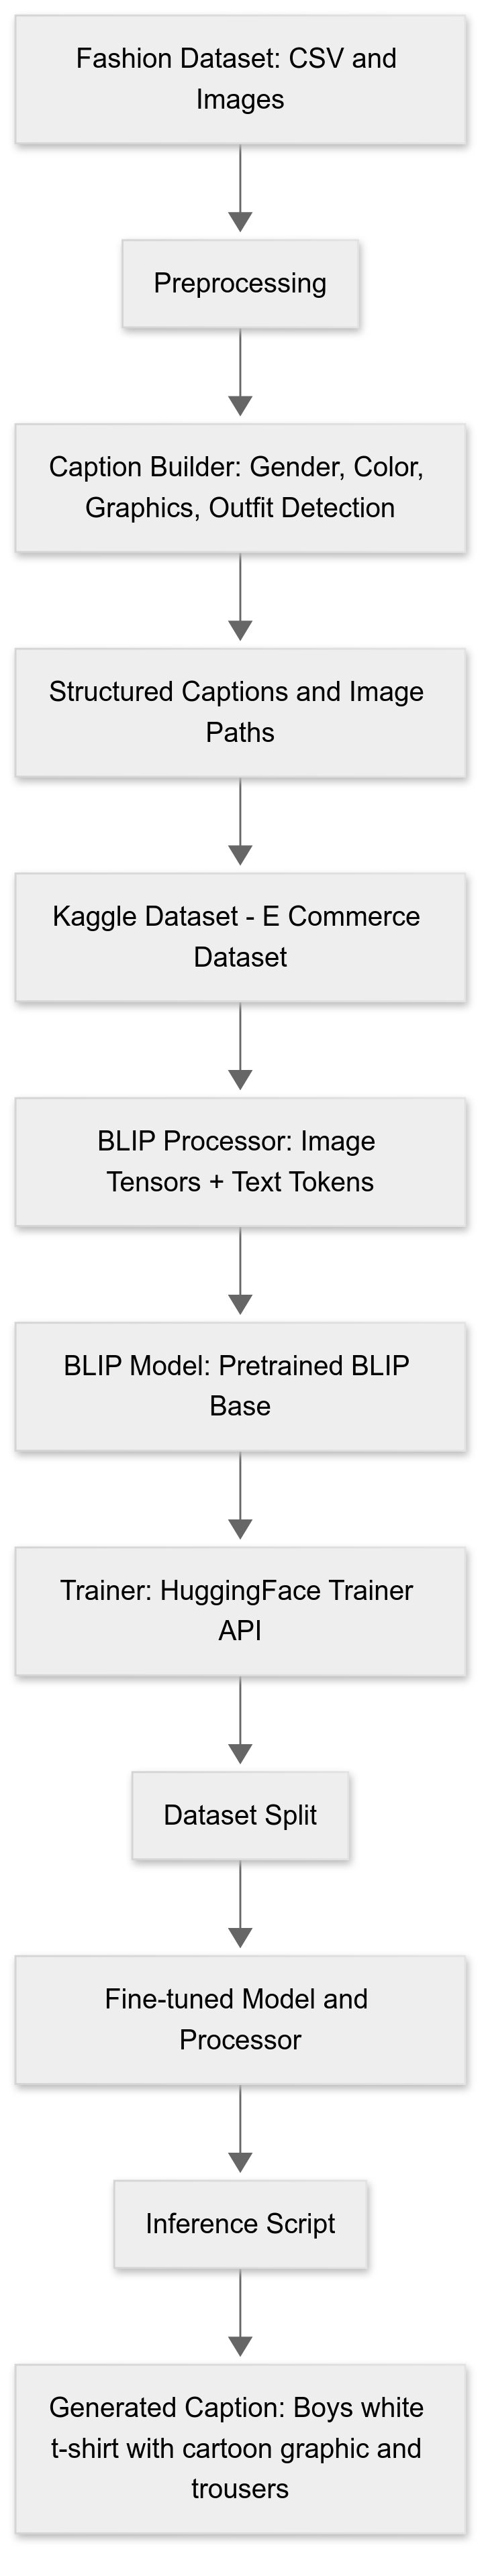

In [1]:
from IPython.display import Image, display

display(Image(filename="/Users/nimishmathur/Desktop/SRH/Privacy, Ethics and Laws/Project/Untitled diagram _ Mermaid Chart-2025-09-19-211531.png"))


## Dataset & Preprocessing

For this project, we use the **Fashion Product Images Dataset** (from Kaggle), which contains a variety of clothing and accessory items.  
This dataset provides a good starting point for training or testing an AI system that generates product descriptions.

**Preprocessing Steps:**
1. **Image Loading** → Read images from local or online dataset.  
2. **Resizing & Normalization** → Standardize dimensions and pixel values for the model.  
3. **Format Conversion** → Ensure images are in RGB format (removing alpha channels if present).  
4. **Metadata Handling** (optional) → Capture product title, brand, or category if available.  
5. **Batching** → Group images for efficient processing by the captioning model.

These preprocessing steps ensure that all product images are ready for caption generation.

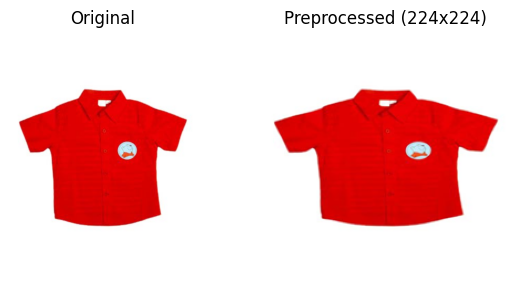

In [51]:
from PIL import Image
import matplotlib.pyplot as plt

# Example: load and preprocess one sample image
img_path = "/Users/nimishmathur/Desktop/SRH/Privacy, Ethics and Laws/Project/Dataset/data/Apparel/Boys/Images/images_with_product_ids/2694.jpg"  

# Load image
img = Image.open(img_path).convert("RGB")

# Resize for consistency (e.g., 224x224)
img_resized = img.resize((224, 224))

# Show before and after inside Jupyter
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(img)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(img_resized)
axes[1].set_title("Preprocessed (224x224)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

## Model & Inference (Caption Generation)

We use a **pretrained Hugging Face image captioning model** to generate alt-text from product images.  
This model takes a preprocessed image as input and outputs a descriptive caption.  

**Steps:**
1. Load the pretrained model and processor.  
2. Run the model on an image.  
3. Decode the prediction into natural language.  
4. Display the image alongside its generated caption.  

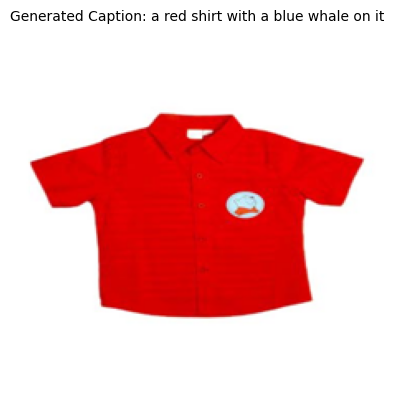

Caption: a red shirt with a blue whale on it


In [52]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

# Load pretrained model (BLIP is good for captioning tasks)
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Use the same preprocessed image from the previous step
inputs = processor(images=img_resized, return_tensors="pt")

# Generate caption
with torch.no_grad():
    output_ids = model.generate(**inputs, max_length=20, num_beams=3)
caption = processor.decode(output_ids[0], skip_special_tokens=True)

# Show image with caption
plt.imshow(img_resized)
plt.axis("off")
plt.title(f"Generated Caption: {caption}", fontsize=10)
plt.show()

print("Caption:", caption)

# Fine-Tuning BLIP for Fashion Image Captioning

## Overview
This project fine-tunes **[Salesforce BLIP (Bootstrapping Language-Image Pretraining)](https://huggingface.co/Salesforce/blip-image-captioning-base)** on a **fashion dataset** consisting of product images and metadata (CSV file with attributes like `Gender`, `Colour`, `ProductType`, `ProductTitle`).  
The goal is to generate **detailed product-style captions** (e.g. *“boys' white and black raglan long-sleeve t-shirt with cartoon graphic, paired with black pants featuring a patch”*).

---

## Dataset
- **Images** are stored in nested folders under `Dataset/data/`.
- **CSV (`fashion.csv`)** contains product attributes:
  - `Image` (filename or relative path)
  - `Gender`, `Colour`, `Category`, `SubCategory`, `ProductType`
  - `ProductTitle`

### Example row
| Image      | Gender | Colour | ProductType | ProductTitle                       |
|------------|--------|--------|-------------|------------------------------------|
| 2738.jpg   | Boys   | White  | T-shirt     | Boys Raglan Tee with Cartoon Print |

---

## Preprocessing

### 1. **Image path resolution**
- Resolve absolute paths by searching recursively inside `IMAGE_ROOT`.
- Skip missing files automatically.

### 2. **Caption construction**
- Generate **rich captions** using multiple fields:
  - `Gender` → *boys’ / women’s / men’s / girls’*  
  - `Colour` + `SubCategory` + `ProductType`  
  - Keywords extracted from `ProductTitle` (*long-sleeve, graphic print, embroidered, patch, striped, denim, etc.*)  
  - Detect **two-piece sets** (e.g. t-shirt + pants).  


In [1]:
pip install transformers datasets accelerate pillow



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade transformers


  Using cached transformers-4.56.1-py3-none-any.whl.metadata (42 kB)
  Using cached tokenizers-0.22.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
Using cached transformers-4.56.1-py3-none-any.whl (11.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.4/563.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.1 MB/s eta 0:00:00a 0:00:01
Using cached tokenizers-0.22.0-cp39-abi3-macosx_11_0_arm64.whl (2.9 MB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.30.2
    Uninstalling huggingface-hub-0.30.2:
      Successfully uninstalled huggingface-hub-0.30.2
  Attempting uninstall: tokenizers90m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/4 [huggingface-hub]
    Found existing installation: tokenizers 0.21.1━━━━━━━━━━━━ 1/4 [huggingface-hub]
    Uninstalling tokenizers-0.21.1:━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/4 [huggingface-hub]
      Successfully uninstalled tokenizers-0.21.1━━━━━━━━━━━━━━ 1/4 [huggingface-hub]
  Attempting un


---

## Training Setup
- **Base model:** `Salesforce/blip-image-captioning-base`
- **Processor:** `BlipProcessor` (handles both image tensorization + text tokenization).
- **Train/Validation split:** 90/10
- **Hyperparameters:**
  - `epochs = 4`
  - `batch_size = 4`
  - `learning_rate = 5e-5`
  - `max_caption_length = 72 tokens`
- **Precision:** 
  - CUDA → `fp16`
  - Apple MPS → `bf16`
  - CPU → full precision

---

## Training Pipeline
1. Load CSV and images.  
2. Build captions → rich descriptive sentences.  
3. Convert to **HuggingFace Dataset**.  
4. Tokenize captions + preprocess images via `BlipProcessor`.  
5. Fine-tune BLIP using HuggingFace `Trainer`.  
6. Save trained model + processor to `./blip-finetuned-fashion-features`.

---

In [ ]:
import os, glob, re, torch, pandas as pd
from datasets import Dataset
from transformers import (
    BlipProcessor, BlipForConditionalGeneration,
    TrainingArguments, Trainer
)
import datasets

# ========== CONFIG ==========
MODEL_ID    = "Salesforce/blip-image-captioning-base"
CSV_PATH    = "/Users/nimishmathur/Desktop/SRH/Privacy, Ethics and Laws/Project/Dataset/data/fashion.csv"
IMAGE_ROOT  = "/Users/nimishmathur/Desktop/SRH/Privacy, Ethics and Laws/Project/Dataset/data"
OUTPUT_DIR  = "./blip-finetuned-fashion-features"
TEST_SIZE   = 0.1
NUM_EPOCHS  = 4          # a bit more to learn the structured style
BATCH_SIZE  = 4
LR          = 5e-5
MAX_TXT_LEN = 72
SEED        = 42
# ===========================

# ---- Hardware & precision
if torch.cuda.is_available():
    use_fp16, use_bf16 = True, False
elif torch.backends.mps.is_available():
    use_fp16, use_bf16 = False, True
else:
    use_fp16, use_bf16 = False, False
print(f"CUDA:{torch.cuda.is_available()}  MPS:{torch.backends.mps.is_available()}  fp16:{use_fp16}  bf16:{use_bf16}")

# ---------- 1) Load CSV ----------
df = pd.read_csv(CSV_PATH)

# ---------- 2) Feature engineering helpers ----------
COLORS = {
    "black","white","red","blue","navy","green","olive","yellow","orange","pink",
    "purple","brown","beige","grey","gray","silver","gold","cream","ivory","maroon",
    "teal","turquoise","offwhite","off-white","multicolor","multi"
}

TOP_ALIASES = {
    "tshirt":"t-shirt","tee":"t-shirt","t-shirt":"t-shirt","shirt":"shirt","top":"top",
    "sweatshirt":"sweatshirt","hoodie":"hoodie","kurta":"kurta","jacket":"jacket","sweater":"sweater"
}
BOTTOM_ALIASES = {
    "jean":"jeans","jeans":"jeans","pant":"pants","pants":"pants","trouser":"trousers","trousers":"trousers",
    "jogger":"joggers","short":"shorts","shorts":"shorts","skirt":"skirt","leggings":"leggings","trackpant":"track pants"
}

FEATURE_PATTERNS = [
    (r"\blong\s*sleeve", "long-sleeve"),
    (r"\bshort\s*sleeve", "short-sleeve"),
    (r"\braglan\b", "raglan"),
    (r"\bgraphic\b", "graphic"),
    (r"\b(cartoon|character)\b", "cartoon"),
    (r"\bprint(ed)?\b", "print"),
    (r"\bembroider(ed|y)?\b", "embroidered"),
    (r"\bpatch\b", "patch"),
    (r"\bstrip(e|ed)s?\b", "striped"),
    (r"\bpolka\b", "polka-dot"),
    (r"\blogo\b", "logo")
]

# Positions (we infer from title words; exact left/right from pixels would
# require labeled data or a detector – this is heuristic)
POSITION_MAP = [
    (r"\bleft\b.*\b(chest|pocket|sleeve)\b", "on the left \\1"),
    (r"\bright\b.*\b(chest|pocket|sleeve)\b", "on the right \\1"),
    (r"\b(chest|pocket|sleeve)\b.*\bleft\b", "on the left \\1"),
    (r"\b(chest|pocket|sleeve)\b.*\bright\b", "on the right \\1"),
    (r"\bleft\b.*\b(leg|thigh)\b", "on the left \\1"),
    (r"\bright\b.*\b(leg|thigh)\b", "on the right \\1"),
    (r"\bfront\b", "on the front"),
    (r"\bback\b", "on the back")
]

def clean_text(x: str) -> str:
    return re.sub(r"\s+", " ", str(x)).strip().lower()

def gender_token(g):
    g = clean_text(g)
    if g.startswith("men"):   return "men’s"
    if g.startswith("women"): return "women’s"
    if g.startswith("boys"):  return "boys’"
    if g.startswith("girls"): return "girls’"
    return ""

def normalize_top(pt:str)->str:
    p = clean_text(pt)
    for k,v in TOP_ALIASES.items():
        if k in p: return v
    return p

def normalize_bottom(pt:str)->str:
    p = clean_text(pt)
    for k,v in BOTTOM_ALIASES.items():
        if k in p: return v
    return p

def extract_colors(*texts):
    words = set()
    for t in texts:
        words |= set(clean_text(t).replace("/", " ").split())
    col = [w for w in words if w in COLORS]
    # normalize offwhite spellings
    col = ["off-white" if w in {"offwhite","off-white"} else w for w in col]
    return sorted(set(col))

def remove_numbers_but_keep_sets(text: str) -> str:
    text = re.sub(r"\b(\d+)(?=\s*[-]?(piece|pack))", r"\1", text) # keep 2-piece / 3-pack
    text = re.sub(r"\b\d+\b", "", text)                            # drop other numbers
    return re.sub(r"\s+", " ", text).strip()

def clean_title(title: str) -> str:
    title = clean_text(title)
    # remove gender mentions & vendor noise
    title = re.sub(r"\b(men|mens|women|womens|boys|girls|kidswear|collection|brand)\b", "", title)
    return remove_numbers_but_keep_sets(title)

def extract_features(title:str):
    feats = [label for pat,label in FEATURE_PATTERNS if re.search(pat, title)]
    # dedupe while preserving order
    feats = list(dict.fromkeys(feats))
    return feats

def extract_position_phrase(title:str):
    for pat, repl in POSITION_MAP:
        m = re.search(pat, title)
        if m:
            phrase = re.sub(pat, repl, m.group(0))
            # Normalize like "on the left sleeve"
            phrase = re.sub(r"\b(\\1)\b", "", phrase) if "\\1" in phrase else phrase
            return phrase
    return ""  # unknown position

def detect_items(pt, sc, title):
    """
    Return ('top','t-shirt') or ('bottom','pants') or ('both','t-shirt','pants')
    using ProductType/SubCategory/Title heuristics.
    """
    pt_all = " ".join([clean_text(x) for x in [pt, sc, title]])
    top = None; bottom = None
    for k,v in TOP_ALIASES.items():
        if k in pt_all:
            top = v; break
    for k,v in BOTTOM_ALIASES.items():
        if k in pt_all:
            bottom = v; break
    if top and bottom:
        return ("both", top, bottom)
    if top:
        return ("top", top)
    if bottom:
        return ("bottom", bottom)
    # fallback
    return ("top", normalize_top(pt) or "top")

def sentence_case(s: str) -> str:
    s = s.strip()
    return s[:1].upper() + s[1:] if s else s

# ---------- Caption builder ----------
def build_caption(row):
    # Core fields
    g  = gender_token(row.get("Gender", ""))
    colour_field = row.get("Colour", "")
    pt = row.get("ProductType", row.get("Category", ""))
    sc = row.get("SubCategory", "")
    title_raw = str(row.get("ProductTitle", ""))

    title = clean_title(title_raw)
    features = extract_features(title)
    position = extract_position_phrase(title)
    colors   = extract_colors(colour_field, title_raw)

    # item detection
    det = detect_items(pt, sc, title)
    if det[0] == "both":
        top_name, bottom_name = det[1], det[2]
        # Build top clause
        top_cols = ", ".join(colors) if colors else ""
        top_feat = " with " + " ".join(features) if features else ""
        top_pos  = (" " + position) if position else ""
        top_clause = f"{g} {top_cols} {top_name}{top_feat}{top_pos}".strip()

        # Build bottom clause (reuse color if only one available)
        bottom_clause = f"{g} {bottom_name}"
        # If position mentions leg/thigh/patch, attach it to bottom
        if re.search(r"leg|thigh|patch", title):
            bottom_clause += (" " + (position or "with patch detail"))
        caption = f"{sentence_case(top_clause)} and {bottom_clause}."
        return caption

    # Single item
    kind, name = det[0], det[1]
    cols = ", ".join(colors) if colors else ""
    feat = " with " + " ".join(features) if features else ""
    pos  = (" " + position) if position else ""
    base = f"{g} {cols} {name}{feat}{pos}".strip()

    # If still too brief, append cleaned title tail
    if len(base.split()) < 6 and title:
        base = f"{base}, {title}"
    base = sentence_case(base)
    if not base.endswith("."):
        base += "."
    return base

# ---------- Apply caption builder ----------
df["caption"] = df.apply(build_caption, axis=1)

# ---------- 3) Resolve images recursively & drop missing ----------
def resolve_path(name: str):
    if not isinstance(name, str):
        return None
    candidate = os.path.join(IMAGE_ROOT, name) if not os.path.isabs(name) else name
    if os.path.exists(candidate):
        return candidate
    filename = os.path.basename(name)
    matches = glob.glob(os.path.join(IMAGE_ROOT, "**", filename), recursive=True)
    if matches:
        return matches[0]
    return None

df["resolved_image"] = df["Image"].apply(resolve_path)
before = len(df)
df = df[df["resolved_image"].notna()].reset_index(drop=True)
after = len(df)
print(f"Kept {after} / {before} rows after resolving image paths.")
if after == 0:
    raise ValueError("No images found. Check IMAGE_ROOT and CSV paths.")

print(df[["Image","caption"]].head(6))

# ---------- 4) HF dataset ----------
hf_ds = Dataset.from_pandas(df[["resolved_image", "caption"]], preserve_index=False)
hf_ds = hf_ds.rename_column("resolved_image", "image")
hf_ds = hf_ds.cast_column("image", datasets.Image())

split = hf_ds.train_test_split(test_size=TEST_SIZE, seed=SEED)
train_ds, val_ds = split["train"], split["test"]
print(f"Train: {len(train_ds)}  Val: {len(val_ds)}")

# ---------- 5) Preprocess ----------
processor = BlipProcessor.from_pretrained(MODEL_ID)

def preprocess(batch):
    images = [img for img in batch["image"]]
    texts  = batch["caption"]
    enc = processor(
        images=images,
        text=texts,
        padding="max_length",
        truncation=True,
        max_length=MAX_TXT_LEN,
        return_tensors="pt"
    )
    enc["labels"] = enc["input_ids"].clone()
    return enc

train_ds = train_ds.map(preprocess, batched=True, remove_columns=train_ds.column_names)
val_ds   = val_ds.map(preprocess,   batched=True, remove_columns=val_ds.column_names)

# ---------- 6) Train ----------
model = BlipForConditionalGeneration.from_pretrained(MODEL_ID)

args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=NUM_EPOCHS,
    learning_rate=LR,
    fp16=use_fp16,
    bf16=use_bf16,
    logging_steps=50,
    save_total_limit=2,
    remove_unused_columns=False,
)

trainer = Trainer(model=model, args=args, train_dataset=train_ds, eval_dataset=val_ds)
trainer.train()

model.save_pretrained(OUTPUT_DIR)
processor.save_pretrained(OUTPUT_DIR)
print(f"✅ Training complete. Model saved to {OUTPUT_DIR}")


CUDA:False  MPS:True  fp16:False  bf16:True
Kept 2906 / 2906 rows after resolving image paths.
       Image                                            caption
0  42419.jpg    Girls’ white top, gini and jony knit white top.
1  34009.jpg         Girls’ black top, gini and jony black top.
2  40143.jpg  Girls’ blue top, gini and jony pretty blossom ...
3  23623.jpg  Girls’ pink top, doodle kids pink i love shopp...
4  47154.jpg   Girls’ black capris, gini and jony black capris.
5  25520.jpg  Girls’ white top, doodle kids city chic white ...
Train: 2615  Val: 291


Map: 100%|██████████| 291/291 [00:10<00:00, 28.74 examples/s]
/opt/homebrew/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
50,5.608100
100,1.176700
150,0.354900
200,0.275400
250,0.274600
300,0.244500
350,0.260000
400,0.238300
450,0.207100
500,0.224000


/opt/homebrew/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/homebrew/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/homebrew/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ Training complete. Model saved to ./blip-finetuned-fashion-features


## Inference
Run the model on a new image:

```python
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

MODEL_PATH = "./blip-finetuned-fashion-features"
IMAGE_PATH = "path/to/test_image.jpg"

model = BlipForConditionalGeneration.from_pretrained(MODEL_PATH)
processor = BlipProcessor.from_pretrained(MODEL_PATH)

image = Image.open(IMAGE_PATH).convert("RGB")
prompt = "a detailed product description:"

inputs = processor(images=image, text=prompt, return_tensors="pt")
outputs = model.generate(
    **inputs,
    max_length=64,
    num_beams=5,
    length_penalty=1.2,
    no_repeat_ngram_size=2
)

caption = processor.decode(outputs[0], skip_special_tokens=True)
print("Generated Caption:", caption)


In [50]:
#newinference
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

MODEL_PATH = "./blip-finetuned-fashion-features"
IMAGE_PATH = "/Users/nimishmathur/Desktop/SRH/Privacy, Ethics and Laws/Project/Dataset/data/Apparel/Boys/Images/images_with_product_ids/2694.jpg"

model = BlipForConditionalGeneration.from_pretrained(MODEL_PATH)
processor = BlipProcessor.from_pretrained(MODEL_PATH)

image = Image.open(IMAGE_PATH).convert("RGB")

# No prompt – let the model describe based on fine-tuning
inputs = processor(images=image, return_tensors="pt")

# Sampling usually gives more natural text than beam search on custom data
output_ids = model.generate(
    **inputs,
    max_length=72,
    do_sample=True,
    top_k=50,
    top_p=0.95
)

caption = processor.decode(output_ids[0], skip_special_tokens=True)

print("📝 Generated Caption:", caption)


📝 Generated Caption: boys ’ red shirt, disney kids boy ' s red twofur layered.


--------------------------------

# Capition Readout

Raw caption: boys ’ red shirt, disney kids boy ' s red twofur layered.
Safety check result: SAFE | boys' red shirt, Disney kids boy's red twofer layered.


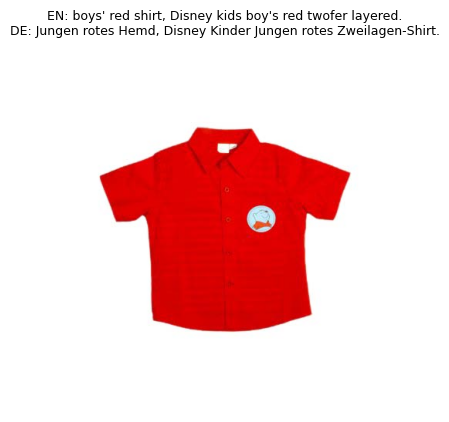

English Caption: boys' red shirt, Disney kids boy's red twofer layered.
German Caption: Jungen rotes Hemd, Disney Kinder Jungen rotes Zweilagen-Shirt.


In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from openai import OpenAI
import torch
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Audio, display

# ========= CONFIG =========
MODEL_PATH = "./blip-finetuned-fashion-features"   # your fine-tuned model path
IMG_PATH   = "/Users/nimishmathur/Desktop/SRH/Privacy, Ethics and Laws/Project/Dataset/data/Apparel/Boys/Images/images_with_product_ids/2694.jpg"
# ==========================

# Load fine-tuned BLIP model + processor
processor = BlipProcessor.from_pretrained(MODEL_PATH)
model = BlipForConditionalGeneration.from_pretrained(MODEL_PATH)

# Load and preprocess test image
img = Image.open(IMG_PATH).convert("RGB")
inputs = processor(images=img, return_tensors="pt")

# OpenAI client
client = OpenAI(api_key="") 

# Step 1: Generate raw caption
with torch.no_grad():
    output_ids = model.generate(
        **inputs,
        max_length=60,         # allow richer captions
        num_beams=5,           # beam search for quality
        length_penalty=1.2,    # encourage longer captions
        no_repeat_ngram_size=2 # avoid repetition
    )
raw_caption = processor.decode(output_ids[0], skip_special_tokens=True)

print("Raw caption:", raw_caption)

# Step 2: Ask ChatGPT if caption is safe
prompt = f"""
You are a safety checker for product image captions in an e-commerce store.
Caption: "{raw_caption}"

1. If the caption is safe, return: SAFE | <final caption to display>
2. If the caption is unsafe or inappropriate, return: UNSAFE | <short explanation>.
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}]
)

safety_check = response.choices[0].message.content
print("Safety check result:", safety_check)

# Step 3: Parse safety check
if safety_check.startswith("SAFE"):
    final_caption = safety_check.split("|", 1)[1].strip()

    # Step 3a: Translate caption into German
    translation_prompt = f"Translate the following product caption into German:\n\n{final_caption}"
    translation_response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": translation_prompt}]
    )
    german_caption = translation_response.choices[0].message.content.strip()

    # Display image with captions
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"EN: {final_caption}\nDE: {german_caption}", fontsize=9)
    plt.show()

    # Step 4: Convert English caption to voice
    audio_response = client.audio.speech.create(
        model="gpt-4o-mini-tts",
        voice="alloy",
        input=final_caption
    )

    # Save and play audio inside notebook
    audio_file = "caption_audio.mp3"
    with open(audio_file, "wb") as f:
        f.write(audio_response.read())

    display(Audio(audio_file))

    print("English Caption:", final_caption)
    print("German Caption:", german_caption)

else:
    print("⚠️ Caption blocked:", safety_check)


# Model Improvement Ideas

- **Longer Captions**: Increase `max_length` during generation and enrich training captions with more descriptive metadata (e.g., material, fit, usage).  
- **Shorter Captions**: Reduce `max_length` and train with compact labels (e.g., only `Gender + ProductType`).  
- **Multilingual Captions**: Translate training captions into target languages (e.g., German, French) and fine-tune BLIP on this multilingual dataset.  
- **Domain Adaptation**: Add more fashion-specific attributes (fabric, style, occasion) to captions to improve accuracy.  
- **Style Control**: Use prompts like *"Generate a short e-commerce title"* vs. *"Generate a detailed description"* to control output style at inference.  


## Value-Based Engineering (VBE)

The system is designed with values at the core, aligned with the European Accessibility Act.  
Each design choice is mapped to a key value:

| Value           | Design Choice                                                                 |
|-----------------|-------------------------------------------------------------------------------|
| Inclusivity     | Captions provide meaningful alt-text for visually impaired users.             |
| Fairness        | Tested on diverse product categories to reduce bias.                         |
| Transparency    | Captions validated through a safety check; unsafe outputs are logged.         |
| Accountability  | Human-in-the-loop ensures responsibility for final captions.                 |
| Accessibility   | Outputs are stored as structured alt-text, compliant with the EAA.           |

## Risk Assessment

Building an AI captioning system introduces several risks.  
We identified the most relevant ones and defined mitigation strategies:

| Risk                     | Description                                             | Mitigation Strategy                          |
|--------------------------|---------------------------------------------------------|----------------------------------------------|
| Incorrect captions       | Model may misidentify product features.                 | Human-in-the-loop review; confidence checks. |
| Offensive language       | Model may generate inappropriate words.                 | Rule-based filters and ChatGPT moderation.   |
| Hallucinations           | Captions may describe objects not present.              | Use beam search; log outputs for review.     |
| Bias in outputs          | Certain product types described less accurately.        | Dataset diversity; periodic audits.          |
| Privacy issues (PII)     | Model could output names or personal data in rare cases.| Restrict input images; PII filter in outputs.|

This risk-oriented design ensures that the system remains **trustworthy, safe, and compliant**.

# Future Work

While the current fine-tuned BLIP model produces domain-specific captions for fashion products, several improvements can be explored in the future:

1. **Caption Length Control**: Introduce explicit control over caption length through prompt engineering or reinforcement learning with user-defined constraints. This would allow generating both concise product titles and detailed descriptions depending on the application.

2. **Multilingual Support**: Extend the dataset by translating captions into multiple languages (e.g., German, French, Spanish). Fine-tuning BLIP on this multilingual corpus would enable global e-commerce use cases.

3. **Enhanced Attribute Coverage**: Enrich captions with additional attributes such as fabric type, fit, seasonality, or intended usage (e.g., casual vs. formal wear). This would improve the commercial value of captions for product search and recommendation systems.

4. **Style Adaptation**: Explore fine-tuning with style-specific prompts (e.g., “marketing-style caption” vs. “technical description”) to provide captions tailored to different audiences and contexts.

5. **Evaluation Metrics**: Incorporate human evaluation and fashion-specific metrics, in addition to BLEU/ROUGE scores, to better assess caption quality and relevance for end-users.
